## Download dataset

In [1]:
!wget https://github.com/SVizor42/ML_Zoomcamp/releases/download/straight-curly-data/data.zip

--2025-11-30 04:59:38--  https://github.com/SVizor42/ML_Zoomcamp/releases/download/straight-curly-data/data.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://release-assets.githubusercontent.com/github-production-release-asset/405934815/e712cf72-f851-44e0-9c05-e711624af985?sp=r&sv=2018-11-09&sr=b&spr=https&se=2025-11-30T05%3A56%3A20Z&rscd=attachment%3B+filename%3Ddata.zip&rsct=application%2Foctet-stream&skoid=96c2d410-5711-43a1-aedd-ab1947aa7ab0&sktid=398a6654-997b-47e9-b12b-9515b896b4de&skt=2025-11-30T04%3A55%3A43Z&ske=2025-11-30T05%3A56%3A20Z&sks=b&skv=2018-11-09&sig=SROxZoXSIBM62xoDjDYL9ZFjoF5PV8KCWbDeAZaoWu4%3D&jwt=eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJnaXRodWIuY29tIiwiYXVkIjoicmVsZWFzZS1hc3NldHMuZ2l0aHVidXNlcmNvbnRlbnQuY29tIiwia2V5Ijoia2V5MSIsImV4cCI6MTc2NDQ4MDU3OCwibmJmIjoxNzY0NDc4Nzc4LCJwYXRoIjoicmVsZWFzZWFzc2V0cHJvZHVjdGlvbi5ibG

In [2]:
!unzip data.zip

Archive:  data.zip
   creating: data/
   creating: data/test/
   creating: data/test/curly/
  inflating: data/test/curly/03312ac556a7d003f7570657f80392c34.jpg  
  inflating: data/test/curly/106dfcf4abe76990b585b2fc2e3c9f884.jpg  
  inflating: data/test/curly/1a9dbe23a0d95f1c292625960e4509184.jpg  
  inflating: data/test/curly/341ea26e6677b655f8447af56073204a4.jpg  
  inflating: data/test/curly/61aPFVrm42L._SL1352_.jpg  
  inflating: data/test/curly/6d8acb0fe980774ea4e5631198587f45.png  
  inflating: data/test/curly/7f5649a0c33a2b334f23221a52c16b9b.jpg  
  inflating: data/test/curly/90146673.jpg  
  inflating: data/test/curly/9b3608e01d78fbabc9fb0719323d507f4.jpg  
  inflating: data/test/curly/b171c99161f3cffc12d4b74488ef2fc6.jpg  
  inflating: data/test/curly/blogger_one.jpg  
  inflating: data/test/curly/c03ca1590aa4df74e922ad8257305a2b.jpg  
  inflating: data/test/curly/c1b89bb4f86a3478ec20ce1f63f003c1.jpg  
  inflating: data/test/curly/c5.jpg  
  inflating: data/test/curly/C86_76156

## Reproducibility

In [3]:
import numpy as np
import torch

SEED = 42
np.random.seed(SEED)
torch.manual_seed(SEED)

if torch.cuda.is_available():
    torch.cuda.manual_seed(SEED)
    torch.cuda.manual_seed_all(SEED)

torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cuda


## Glimpse on the image

In [6]:
import torchvision

path = '/content/data/train/straight/'

# Since the file path can be super long as seen from the name, we can use f-strings to piece them together
name = '000028d73-Nicole_Scherzinger.jpg'

fullname = f'{path}/{name}'
test_image = torchvision.io.read_image(fullname)
test_image.shape

torch.Size([3, 480, 360])

In [7]:
# This is how matplotlib reads the image
import matplotlib.image as mpimg

img = mpimg.imread(fullname)
img.shape

(480, 360, 3)

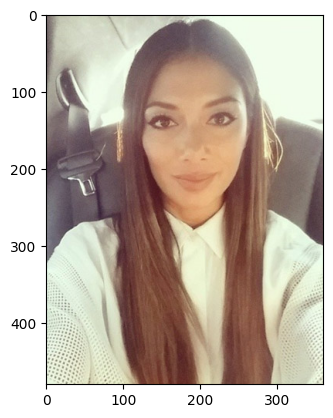

In [8]:
from PIL import Image
img = Image.open(fullname).convert('RGB')
plt.imshow(img)

## Model - PyTorch

### NN model

In [9]:
import torch
import torch.nn as nn


class BinaryCNN(nn.Module):
    def __init__(self):
        super(BinaryCNN, self).__init__()

        # Convolutional layer
        self.conv = nn.Conv2d(
            in_channels=3,
            out_channels=32,
            kernel_size=3
        )

        # Activation
        self.relu = nn.ReLU()

        # Max pooling
        self.pool = nn.MaxPool2d(kernel_size=2)

        # Fully-connected layers
        # After conv + pool, size becomes:
        # Input: (3, 200, 200)
        # Conv → (32, 198, 198)
        # MaxPool(2) → (32, 99, 99)
        self.fc1 = nn.Linear(32 * 99 * 99, 64)
        self.fc2 = nn.Linear(64, 1)

        # Output activation for binary classification
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.conv(x)
        x = self.relu(x)
        x = self.pool(x)

        x = x.view(x.size(0), -1)  # flatten

        x = self.fc1(x)
        x = self.relu(x)

        x = self.fc2(x)
        x = self.sigmoid(x)

        return x


# Create the model
model = BinaryCNN()

# Optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.002, momentum=0.8)

### Loss function - Q1

In [10]:
criterion = nn.BCEWithLogitsLoss()

### NO of parameters - Q2

In [13]:
model.to(device)
# Option 1: Using torchsummary (install with: pip install torchsummary)
from torchsummary import summary
summary(model, input_size=(3, 200, 200))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 198, 198]             896
              ReLU-2         [-1, 32, 198, 198]               0
         MaxPool2d-3           [-1, 32, 99, 99]               0
            Linear-4                   [-1, 64]      20,072,512
              ReLU-5                   [-1, 64]               0
            Linear-6                    [-1, 1]              65
           Sigmoid-7                    [-1, 1]               0
Total params: 20,073,473
Trainable params: 20,073,473
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.46
Forward/backward pass size (MB): 21.54
Params size (MB): 76.57
Estimated Total Size (MB): 98.57
----------------------------------------------------------------


In [12]:
# Option 2: Manual counting
total_params = sum(p.numel() for p in model.parameters())
print(f"Total parameters: {total_params}")

Total parameters: 20073473


### Generators and Training

In [17]:
from torchvision import transforms
from torchvision.datasets import ImageFolder

train_transforms = transforms.Compose([
    transforms.Resize((200, 200)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    ) # ImageNet normalization
])

train_dataset = ImageFolder(root="/content/data/train", transform=train_transforms)
validation_dataset = ImageFolder(root="/content/data/test", transform=train_transforms)

In [18]:
from torch.utils.data import DataLoader

train_loader = DataLoader(
    train_dataset,
    batch_size=20,
    shuffle=True
)

validation_loader = DataLoader(
    validation_dataset,
    batch_size=20,
    shuffle=False
)

In [20]:
# fit the model
num_epochs = 10
history = {'acc': [], 'loss': [], 'val_acc': [], 'val_loss': []}

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        labels = labels.float().unsqueeze(1) # Ensure labels are float and have shape (batch_size, 1)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)
        # For binary classification with BCEWithLogitsLoss, apply sigmoid to outputs before thresholding for accuracy
        predicted = (torch.sigmoid(outputs) > 0.5).float()
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(train_dataset)
    epoch_acc = correct_train / total_train
    history['loss'].append(epoch_loss)
    history['acc'].append(epoch_acc)

    model.eval()
    val_running_loss = 0.0
    correct_val = 0
    total_val = 0
    with torch.no_grad():
        for images, labels in validation_loader:
            images, labels = images.to(device), labels.to(device)
            labels = labels.float().unsqueeze(1)

            outputs = model(images)
            loss = criterion(outputs, labels)

            val_running_loss += loss.item() * images.size(0)
            predicted = (torch.sigmoid(outputs) > 0.5).float()
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    val_epoch_loss = val_running_loss / len(validation_dataset)
    val_epoch_acc = correct_val / total_val
    history['val_loss'].append(val_epoch_loss)
    history['val_acc'].append(val_epoch_acc)

    print(f"Epoch {epoch+1}/{num_epochs}, "
          f"Loss: {epoch_loss:.4f}, Acc: {epoch_acc:.4f}, "
          f"Val Loss: {val_epoch_loss:.4f}, Val Acc: {val_epoch_acc:.4f}")

Epoch 1/10, Loss: 0.6795, Acc: 0.4875, Val Loss: 0.6595, Val Acc: 0.4876
Epoch 2/10, Loss: 0.6509, Acc: 0.4875, Val Loss: 0.6537, Val Acc: 0.4876
Epoch 3/10, Loss: 0.6398, Acc: 0.4875, Val Loss: 0.6548, Val Acc: 0.4876
Epoch 4/10, Loss: 0.6368, Acc: 0.4875, Val Loss: 0.6599, Val Acc: 0.4876
Epoch 5/10, Loss: 0.6348, Acc: 0.4913, Val Loss: 0.6528, Val Acc: 0.4876
Epoch 6/10, Loss: 0.6208, Acc: 0.4875, Val Loss: 0.6529, Val Acc: 0.4876
Epoch 7/10, Loss: 0.6138, Acc: 0.4875, Val Loss: 0.6564, Val Acc: 0.4876
Epoch 8/10, Loss: 0.6105, Acc: 0.4888, Val Loss: 0.6605, Val Acc: 0.4876
Epoch 9/10, Loss: 0.6035, Acc: 0.4875, Val Loss: 0.6555, Val Acc: 0.4876
Epoch 10/10, Loss: 0.5968, Acc: 0.4875, Val Loss: 0.6546, Val Acc: 0.4876


In [24]:
# Q4
np.std(history["loss"])

np.float64(0.023594287793046304)

### Data Augmentation

In [25]:
from torchvision import transforms

train_transform_aug = transforms.Compose([
    transforms.RandomRotation(50),
    transforms.RandomResizedCrop(200, scale=(0.9, 1.0), ratio=(0.9, 1.1)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

train_dataset = ImageFolder(root="/content/data/train", transform=train_transform_aug)

train_loader = DataLoader(
    train_dataset,
    batch_size=20,
    shuffle=True
)

In [26]:
# fit the model
num_epochs = 10
history_aug = {'acc': [], 'loss': [], 'val_acc': [], 'val_loss': []}

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        labels = labels.float().unsqueeze(1) # Ensure labels are float and have shape (batch_size, 1)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)
        # For binary classification with BCEWithLogitsLoss, apply sigmoid to outputs before thresholding for accuracy
        predicted = (torch.sigmoid(outputs) > 0.5).float()
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(train_dataset)
    epoch_acc = correct_train / total_train
    history_aug['loss'].append(epoch_loss)
    history_aug['acc'].append(epoch_acc)

    model.eval()
    val_running_loss = 0.0
    correct_val = 0
    total_val = 0
    with torch.no_grad():
        for images, labels in validation_loader:
            images, labels = images.to(device), labels.to(device)
            labels = labels.float().unsqueeze(1)

            outputs = model(images)
            loss = criterion(outputs, labels)

            val_running_loss += loss.item() * images.size(0)
            predicted = (torch.sigmoid(outputs) > 0.5).float()
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    val_epoch_loss = val_running_loss / len(validation_dataset)
    val_epoch_acc = correct_val / total_val
    history_aug['val_loss'].append(val_epoch_loss)
    history_aug['val_acc'].append(val_epoch_acc)

    print(f"Epoch {epoch+1}/{num_epochs}, "
          f"Loss: {epoch_loss:.4f}, Acc: {epoch_acc:.4f}, "
          f"Val Loss: {val_epoch_loss:.4f}, Val Acc: {val_epoch_acc:.4f}")

Epoch 1/10, Loss: 0.6526, Acc: 0.4913, Val Loss: 0.6553, Val Acc: 0.5025
Epoch 2/10, Loss: 0.6493, Acc: 0.4988, Val Loss: 0.6506, Val Acc: 0.5224
Epoch 3/10, Loss: 0.6407, Acc: 0.5025, Val Loss: 0.6508, Val Acc: 0.5373
Epoch 4/10, Loss: 0.6398, Acc: 0.5050, Val Loss: 0.6557, Val Acc: 0.5323
Epoch 5/10, Loss: 0.6360, Acc: 0.5112, Val Loss: 0.6526, Val Acc: 0.5373
Epoch 6/10, Loss: 0.6358, Acc: 0.5050, Val Loss: 0.6500, Val Acc: 0.5373
Epoch 7/10, Loss: 0.6367, Acc: 0.5162, Val Loss: 0.6517, Val Acc: 0.5423
Epoch 8/10, Loss: 0.6344, Acc: 0.5162, Val Loss: 0.6523, Val Acc: 0.5473
Epoch 9/10, Loss: 0.6378, Acc: 0.5088, Val Loss: 0.6519, Val Acc: 0.5473
Epoch 10/10, Loss: 0.6367, Acc: 0.5100, Val Loss: 0.6500, Val Acc: 0.5473
